# **Medical Cost Personal Dataset**
Dataset can be found at https://www.kaggle.com/mirichoi0218/insurance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Downloading the data and taking quick Glance at the data**

In [ ]:
df=pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

Checking random sample of data (random 1% of Total data) 

In [ ]:
df.sample(frac=.01)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We notice here that :-

Age:-The minumum age of Person covered with Insurance is 18 and the maximum age is 64. People are in avearge age range (mean) of 39.

BMI :-BMI is between 15.96 and 53.13. The mean Body Mass Index is 30.66.

Children:-The numbers of children customer have are between 0 and 5.

Charges:-They are between 1121.87 and 63770.43. The mean charges are 13270.42.

---



In [ ]:
df.info()
print(f'The Number of rows are {(df.shape)[0]} and the number of columns are {(df.shape)[1]} ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
The Number of rows are 1338 and the number of columns are 7 


There are no Null values/Missing Data in the Dataset.

The Number of rows are 1338 and the number of Columns are 7

**Column wrangling**

In [ ]:
# Renaming the columns with Titlecase()

df.rename(columns={'age':"Age", 'sex':"Sex", 'bmi':"BMI", 'children':"Children", 'smoker':"Smoker", 'region':"Region", 'charges':"Charges"},inplace=True)

In [ ]:
# Converting the values in Dataframe in TitleCase()

def changecase(df,columns):
   for i in columns:
    df.loc[:,i]=df.loc[:,i].str.title()
   return df

df=changecase(df,columns=["Sex","Smoker","Region"])

**Analysing Distribution of People Covered in Insurance by Sex,Children,BMI,Region and Smoker/Non-Smoker Category**

*By Sex*

1) Percentage of Male Covered in Policy :-50.5 %

2) Percentage of Female Covered in Policy :-49.5 %

Both the Gender are almost equally covered in Insurance Policies

Male      676
Female    662
Name: Sex, dtype: int64


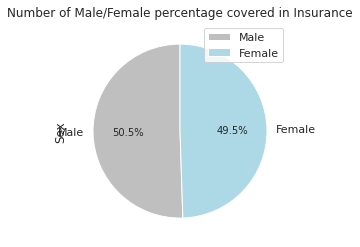

In [ ]:
sexCount=df["Sex"].value_counts()
print(sexCount)
df["Sex"].value_counts().plot(kind="pie",legend=True,title="Number of Male/Female percentage covered in Insurance",autopct='%1.1f%%',startangle=90,colors=["0.75","lightblue"])


*By Smoker/Non-Smoker*

1) Percentage of Smokers Covered in Policy :-20.5 % 

2) Percentage of Non-Smokers Covered in Policy :-80 % 

No     1064
Yes     274
Name: Smoker, dtype: int64


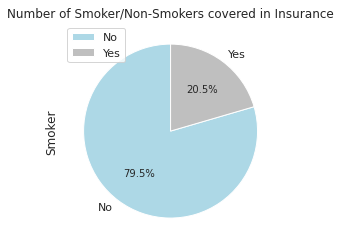

In [ ]:
smokercount=df["Smoker"].value_counts()
print(smokercount)
df["Smoker"].value_counts().plot(kind="pie",legend=True,title="Number of Smoker/Non-Smokers covered in Insurance",autopct='%1.1f%%',startangle=90,colors=["lightblue","0.75"])


*By Region*

We see that People from SouthEast Residential Area are covered maximum under Insurance followed by SouthWest

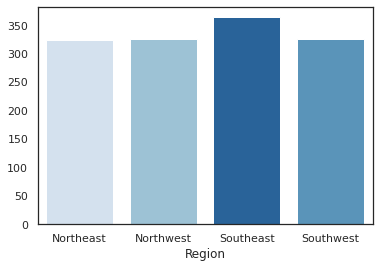

In [ ]:
sns.set_theme(style="white", color_codes=True)
regioncount=df.groupby("Region").size() # data underlying bar plot 
pal = sns.color_palette("Blues", len(regioncount))
rank = regioncount.argsort()
sns.barplot(x=regioncount.index, y=regioncount, palette=np.array(pal[::])[rank])
plt.show()

*By Age*

22 % of People are lying under the Age group of 17-25,
while 21% people under the Age group of 45-55
Only 16% of people in age group (55-64) are covered under Insurance

17-25    0.228700
45-55    0.212257
25-35    0.200299
35-45    0.197309
55-64    0.161435
Name: AgeBins, dtype: float64

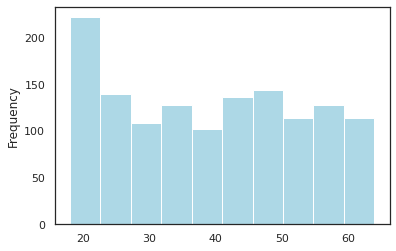

In [ ]:
#  Binning the data

df["Age"].plot(kind="hist",color="lightblue")
cut_labels = ['17-25','25-35','35-45','45-55','55-64']
cut_bins = [17,25,35,45,55,64]
df['AgeBins'] = pd.cut(df['Age'], bins=cut_bins, labels=cut_labels)

# Peforming value counts

df["AgeBins"].value_counts(normalize=True)

*By BMI*

The distribution of BMI follows Normal Distribution/Bell Curve.

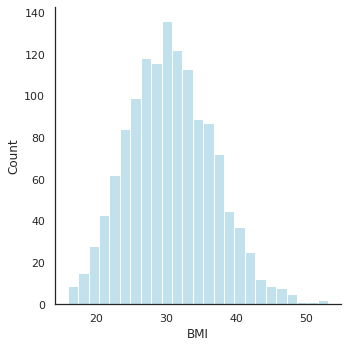

In [ ]:
sns.displot(df.BMI,color="lightblue",kind="hist")
plt.show()

*By Children*

574 people (42%) of the People does not have any children,
Only 324 people (24% of the Total Percentage) have 1 children
Only 18 People have 5 kids.

The distribution of Number of Children is not normal. There are too many people who do not have any kids.

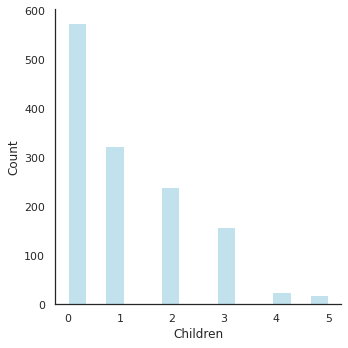

In [ ]:
df.groupby("Children").size()
sns.displot(df.Children,color="lightblue")

**Analyzing the Medical charges based on Age,Sex,Region and Smoking,Children,BMI column**

*By Sex*

Insurance Medical costs are higher for Male (13956.75) then Females (12569.57).

Sex
Female    12569.578844
Male      13956.751178
Name: Charges, dtype: float64


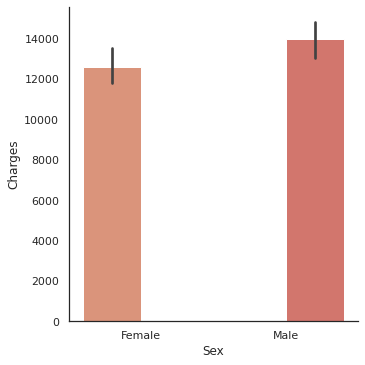

In [ ]:
print(df.groupby("Sex").Charges.mean())
pal = sns.color_palette("flare")
sns.catplot(x="Sex",y="Charges",data=df,hue="Sex",palette=pal,kind="bar")

*By Smoking Category*

Insurance Medical costs are higher for People who smoke (32050.23) than those who do not smoke (8434.26).

Smoker
No      8434.268298
Yes    32050.231832
Name: Charges, dtype: float64


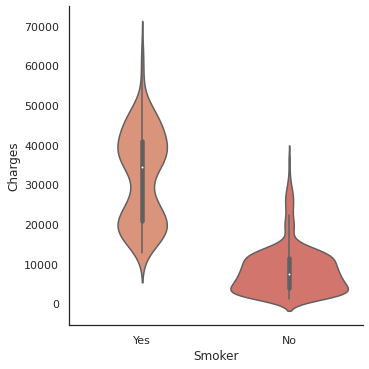

In [ ]:
print(df.groupby("Smoker").Charges.mean())
pal = sns.color_palette("flare")
sns.catplot(data=df,x="Smoker",y="Charges",kind="violin",palette=pal)

*By Region*

Medical Insurance cost bills are higher for people residing in Southeast Region and lowest for whose who reside in SouthWest Region.

Region
Northeast    13406.384516
Northwest    12417.575374
Southeast    14735.411438
Southwest    12346.937377
Name: Charges, dtype: float64


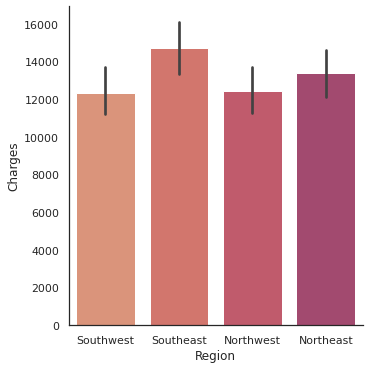

In [ ]:
print(df.groupby("Region").Charges.mean())
sns.catplot(kind="bar",data=df,x="Region",y="Charges",palette=pal)

*By Sex and Smoking Category*

Medical cost bils are higher for men who smoke then those who do not smoke.

Sex     Smoker
Female  No         8762.297300
        Yes       30678.996276
Male    No         8087.204731
        Yes       33042.005975
Name: Charges, dtype: float64


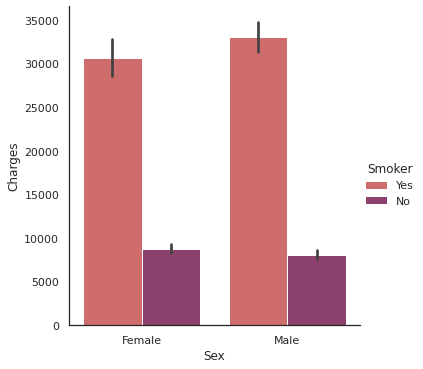

In [ ]:
print(df.groupby(["Sex","Smoker"]).Charges.mean())
sns.catplot(x="Sex",y="Charges",data=df,hue="Smoker",kind="bar",palette="flare")

*By Agebins*

Medical cost bils are higher (Medical cost bills =18795) for customers who are inhigher age group (55-64 ) and lower (Medical cost bills =9087 )for customers who are in younger Age Group (17-25)

AgeBins
17-25     9087.015807
25-35    10495.163047
35-45    13493.485247
45-55    15986.900310
55-64    18795.993816
Name: Charges, dtype: float64


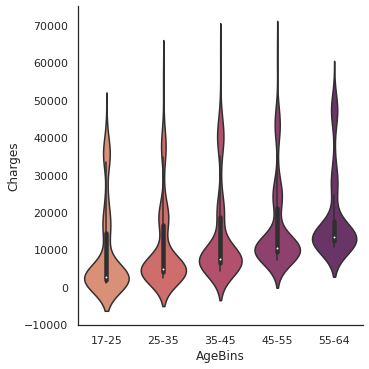

In [ ]:
print(df.groupby("AgeBins").Charges.mean())
sns.catplot(data=df,kind="violin",x="AgeBins",y="Charges",palette="flare")

*By Number of Children*

Medical personal costs are higher for people who have 2-3 children and lesser for people who have 5 children

In [ ]:
df.groupby("Children").Charges.mean()

Children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: Charges, dtype: float64